<a href="https://colab.research.google.com/github/Vrushalmnaik/pythonrepos/blob/main/Copy_of_Plot_of_combine_into_tabs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
from google.colab import drive
import numpy as np  # for handling missing values
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
# Prompt the user for the file path of the Excel file
excel_file_path = input("Enter the file path of the Excel file containing the data: ")

# Read the Excel file into a dictionary of DataFrames
dfs = pd.read_excel(excel_file_path, sheet_name=None)

Enter the file path of the Excel file containing the data: /content/gdrive/MyDrive/DATA sets/Schuab hall/Schaub_VAV 200.xlsx


For Plotting multiple charts that are in a folder. This code opens the folder and loops through each file and then plots the charts as required RmTmp vs Time


Enter the folder path containing Excel files: /content/gdrive/MyDrive/DATA sets/Schuab hall


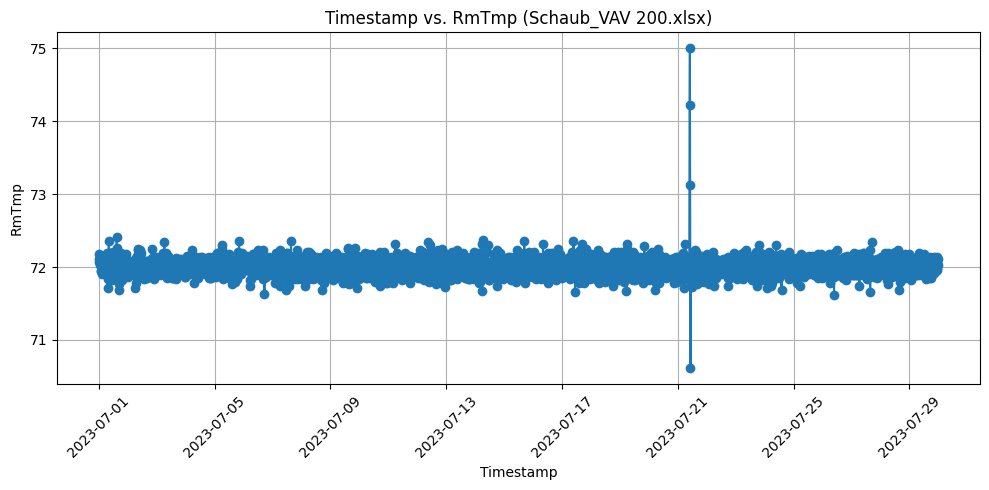

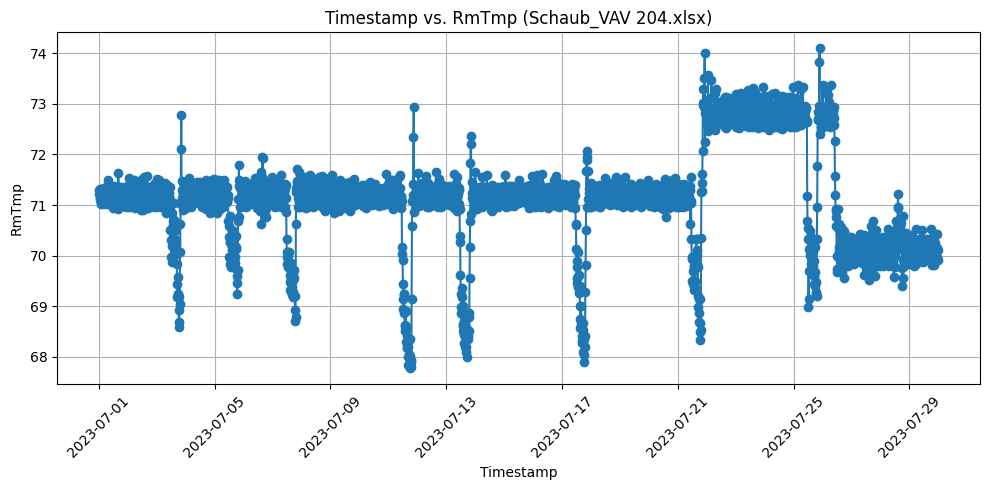

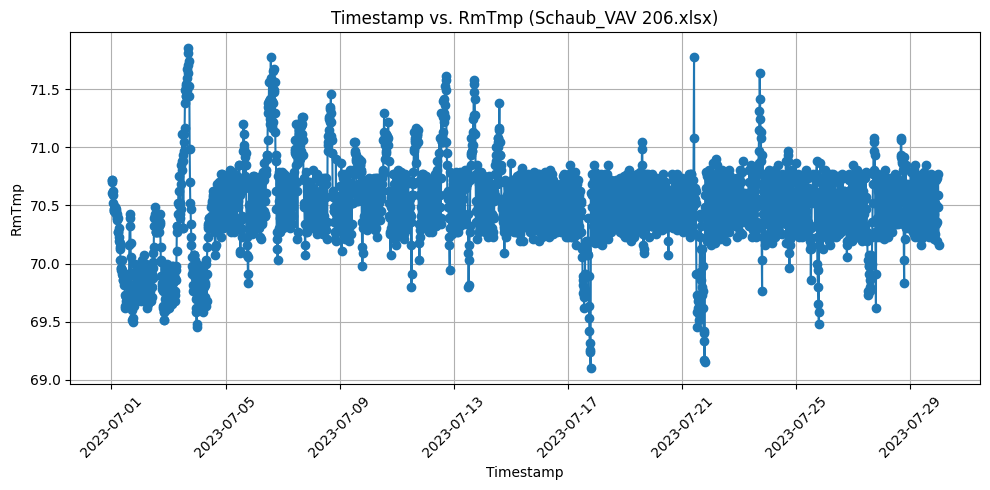

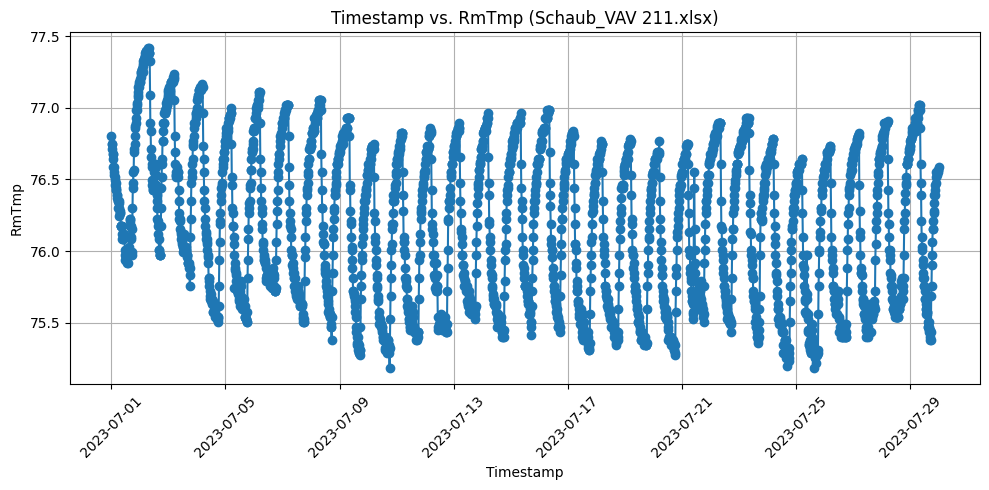

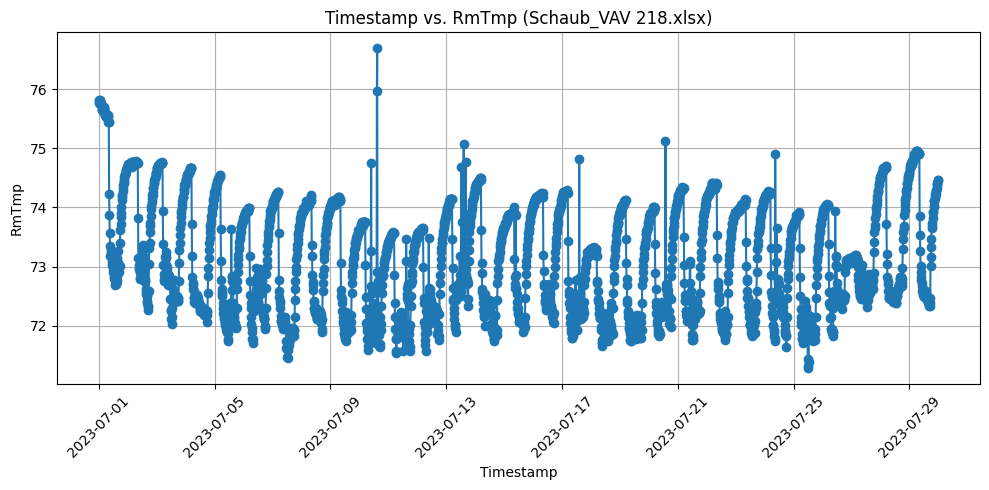

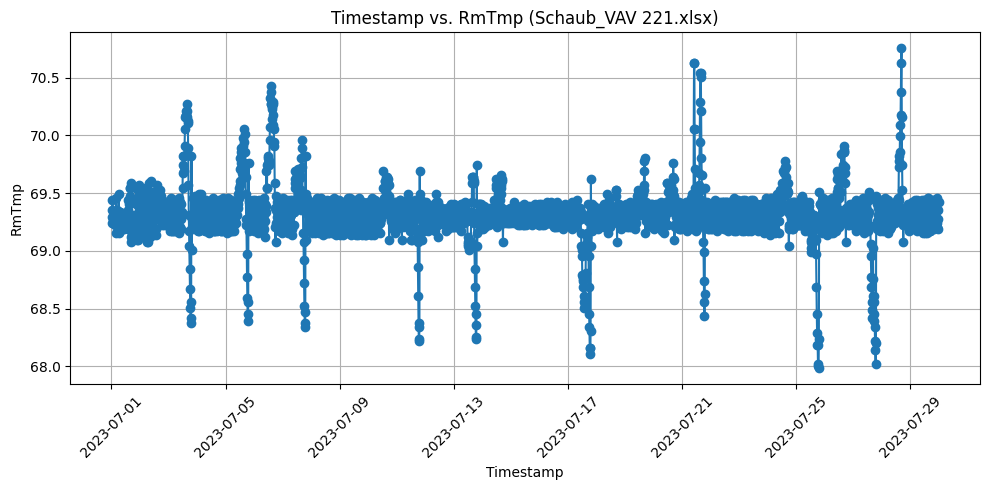

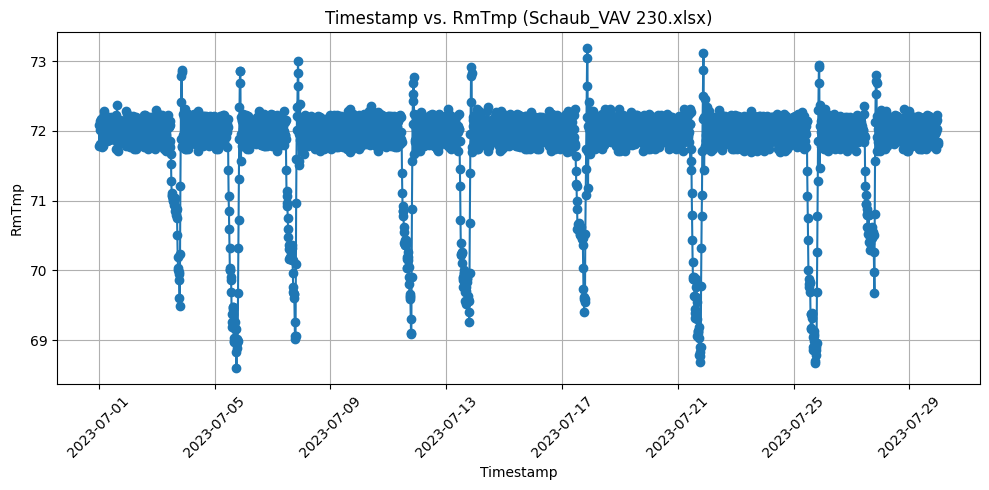

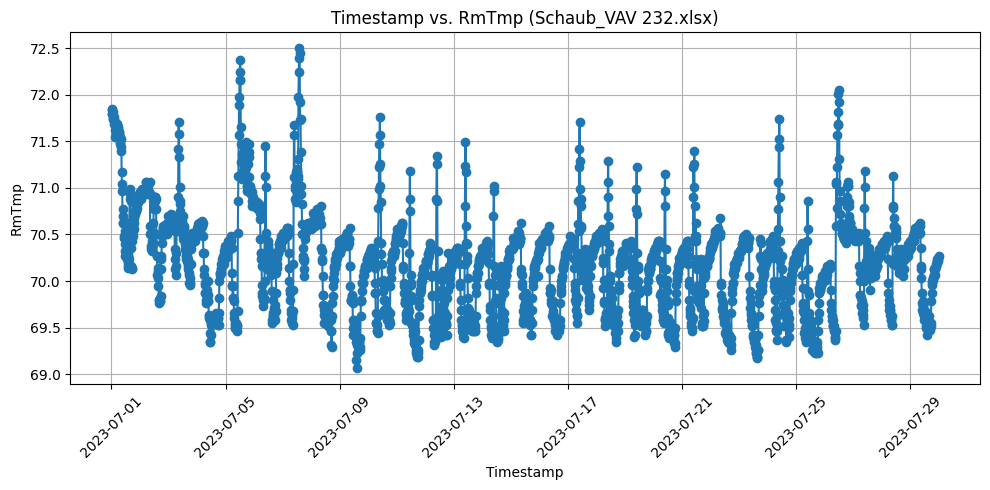

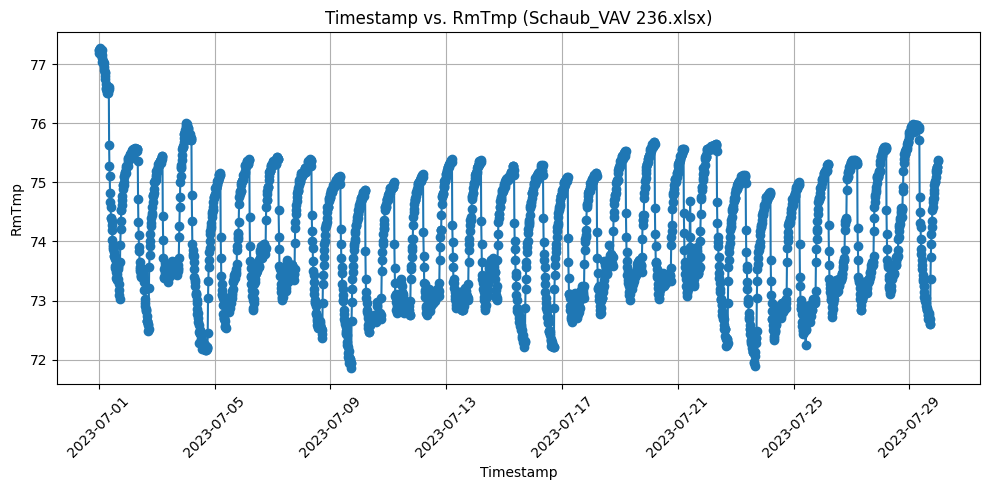

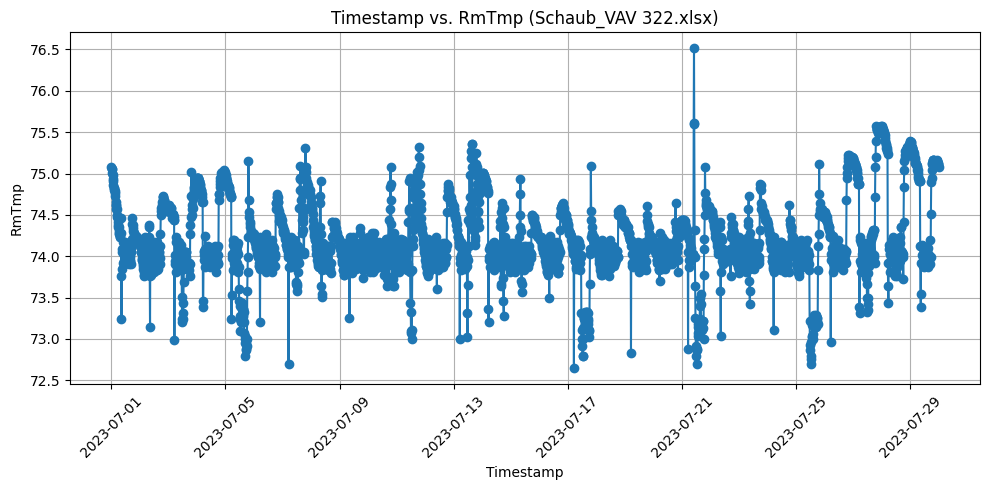

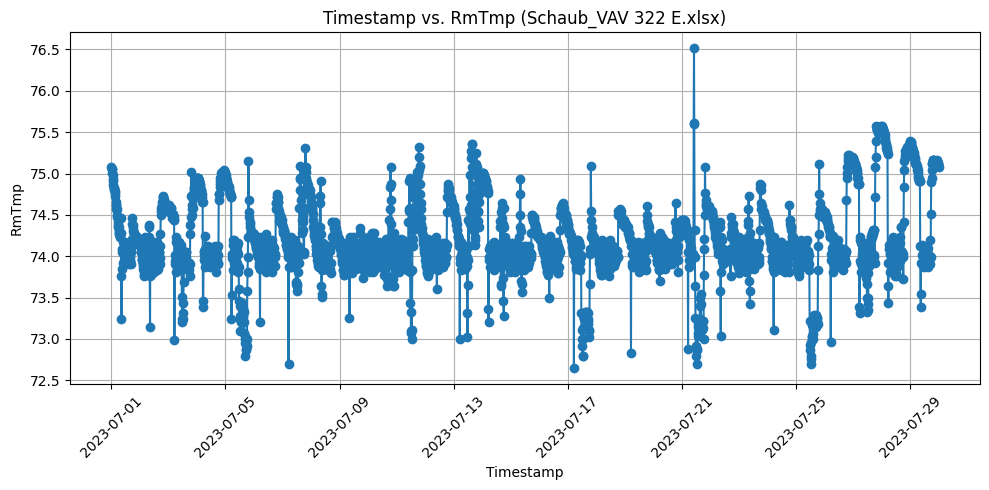

In [ ]:
#TEst code for plotting data in specific time frame
import os
import pandas as pd
import matplotlib.pyplot as plt

# Ask user for folder path
folder_path = input("Enter the folder path containing Excel files: ")

# List all Excel files in the specified folder
excel_files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx') or f.endswith('.xls')]

# Loop through each Excel file and plot the data
for excel_file in excel_files:
    file_path = os.path.join(folder_path, excel_file)

    # Read the first sheet from the Excel file
    df = pd.read_excel(file_path)

    # Parse timestamp column as datetime
    if 'Timestamp' in df.columns:
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])

        # Filter data within the specified date range
        df_filtered = df[(df['Timestamp'] >= '2023-07-01') & (df['Timestamp'] <= '2023-07-30')]

        if not df_filtered.empty:
            # Plot
            plt.figure(figsize=(10, 5))
            plt.plot(df_filtered['Timestamp'], df_filtered['RmTmp'], marker='o', linestyle='-')
            plt.title(f'Timestamp vs. RmTmp ({excel_file})')
            plt.xlabel('Timestamp')
            plt.ylabel('RmTmp')
            plt.xticks(rotation=45)
            plt.grid(True)
            plt.tight_layout()

            # Save the plotted chart as a JPG file with the name of the Excel file
            excel_file_name = os.path.splitext(excel_file)[0]  # Extracting file name without extension
            plt.savefig(os.path.join(folder_path, f'{excel_file_name}_chart.jpg'))

            # Show the plot
            plt.show()
        else:
            print(f"No data available within the specified date range for {excel_file}")
    else:
        print(f"No timestamp column found in {excel_file}")


In [ ]:
#old code which did no have th specific date filtering
# Ask user for folder path
folder_path = input("Enter the folder path containing Excel files: ")

# List all Excel files in the specified folder
excel_files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx') or f.endswith('.xls')]

# Loop through each Excel file and plot the data
for excel_file in excel_files:
    file_path = os.path.join(folder_path, excel_file)

    # Read the first sheet from the Excel file
    df = pd.read_excel(file_path)

    # Parse timestamp column as datetime
    if 'Timestamp' in df.columns:
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])

        # Plot
        plt.figure(figsize=(10, 5))
        plt.plot(df['Timestamp'], df['RmTmp'], marker='o', linestyle='-')
        plt.title(f'Timestamp vs. RmTmp ({excel_file})')
        plt.xlabel('Timestamp')
        plt.ylabel('RmTmp')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()

        # Save the plotted chart as a JPG file with the name of the Excel file
        excel_file_name = os.path.splitext(excel_file)[0]  # Extracting file name without extension
        plt.savefig(os.path.join(folder_path, f'{excel_file_name}_charttt.jpg'))

        # Show the plot
        plt.show()


Code for plotting Single excel sheet. This file should include 2 columns with specifed name 'Timestamp' and 'RmTmp'

Available tabs:
Sheet1
Enter the name of the tab containing the data you want to plot: Sheet1
Sheet1


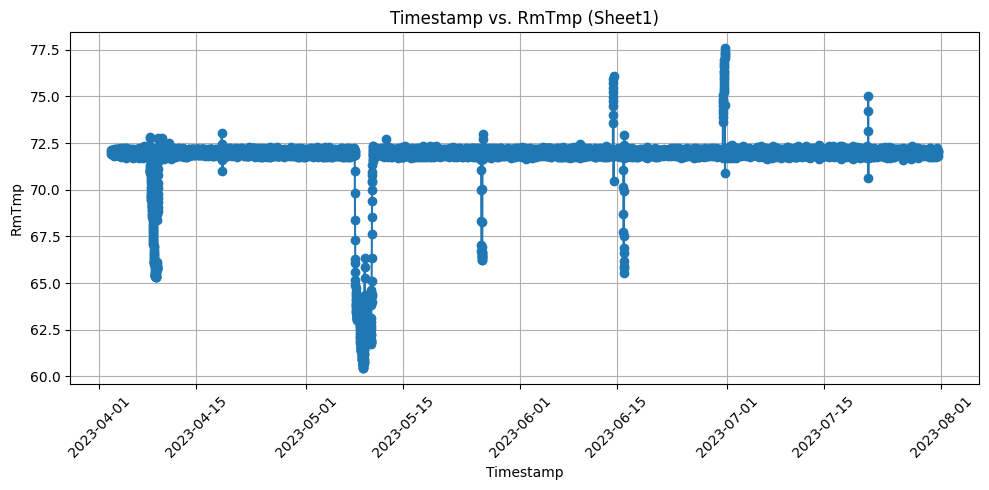

In [ ]:

# List available tabs
print("Available tabs:")
for tab_name in dfs.keys():
    print(tab_name)

# Choose the tab containing the data you want to plot
selected_tab = input("Enter the name of the tab containing the data you want to plot: ")

# Extract the DataFrame from the selected tab
df = dfs[selected_tab]

# Parse timestamp column as datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df['Timestamp'], df['RmTmp'], marker='o', linestyle='-')
plt.title(f'Timestamp vs. RmTmp ({selected_tab})')
plt.xlabel('Timestamp')
plt.ylabel('RmTmp')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Save the plotted chart as a JPG file with the name of the Excel file
excel_file_name = os.path.splitext(selected_tab)[0]  # Extracting file name without extension
print(excel_file_name)

plt.savefig(f'{excel_file_name}_chart.jpg')

# Show the plot
plt.show()


In [ ]:
# Prompt the user to enter the folder path
data_file_folder = input("Enter the folder path containing the Excel files: ")

Enter the folder path containing the Excel files: /content/gdrive/MyDrive/DATA sets/project visualization/Building 1911


In [ ]:

# Validate the user input and handle potential errors
while True:
    if os.path.exists(data_file_folder):
        break
    else:
        print("Invalid folder path. Please enter the correct path.")

dfs = {}
for file in os.listdir(data_file_folder):
    if file.endswith(".xlsx") and not file.startswith("~"):
        print(f"Loading file {file}...")
        df = pd.read_excel(os.path.join(data_file_folder, file))
        # Rounding off the data to one decimal place
        df = df.round(1)
        dfs[file.split('.')[0]] = df  # Store DataFrame with filename as key


Combine DataFrames into a single Excel file with each DataFrame as a separate tab

In [ ]:
# Prompt the user for the filename
output_filename = input("Enter the desired filename for the master Excel file : ")

# Combine DataFrames into a single Excel file with each DataFrame as a separate tab
output_file_path = f'{output_filename}.xlsx'  # Saving to the current working directory
with pd.ExcelWriter(output_file_path) as writer:
    for sheet_name, df in dfs.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

print(f"Combined data saved to '{output_file_path}'")


Enter the desired filename for the master Excel file : VAV_Combined_1911
Combined data saved to 'VAV_Combined_1911.xlsx'
